# Products Rating Prediction Project

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## The Data file 

In [3]:
df=pd.read_csv('scrape_data.csv')

In [4]:
df

,Unnamed: 0,rating,review
0,0,3,"check the detail description, the CPU speed is..."
1,1,1,The laptop is not working properly. The issues...
2,2,4,"This laptop is indeed stylish, slim and good l..."
3,3,5,After so many research on internet I brought t...
4,4,3,Over all good performance for basic use for bu...
...,...,...,...
23531,1175,3,The tv looks great and have amazing features. ...
23532,1176,3,The TV reached me in good condition and delive...
23533,1177,3,honest comment...\n1) Pictures are dull as com...
23534,1178,3,"this is the best tv i ever had,very good price..."


In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df['rating'].value_counts()

5    6264
1    4649
3    4448
2    4097
4    4078
Name: rating, dtype: int64

In [7]:
df.isnull().sum()

rating     0
review    38
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df['rating'].value_counts()

5    6233
1    4647
3    4446
2    4096
4    4076
Name: rating, dtype: int64

In [10]:
df.shape

(23498, 2)

In [11]:
df['review']=df['review'].str.lower()
df['review']

0        check the detail description, the cpu speed is...
1        the laptop is not working properly. the issues...
2        this laptop is indeed stylish, slim and good l...
3        after so many research on internet i brought t...
4        over all good performance for basic use for bu...
                               ...                        
23531    the tv looks great and have amazing features. ...
23532    the tv reached me in good condition and delive...
23533    honest comment...\n1) pictures are dull as com...
23534    this is the best tv i ever had,very good price...
23535    feature rich on paper but not smart enough as ...
Name: review, Length: 23498, dtype: object

In [12]:
df['length']=df.review.str.len()
df.head()

,rating,review,length
0,3,"check the detail description, the cpu speed is...",243
1,1,the laptop is not working properly. the issues...,307
2,4,"this laptop is indeed stylish, slim and good l...",609
3,5,after so many research on internet i brought t...,467
4,3,over all good performance for basic use for bu...,333


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23535
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  23498 non-null  int64 
 1   review  23498 non-null  object
 2   length  23498 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 734.3+ KB


In [14]:
df['review']=df['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

df['review']=df['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

df['review']=df['review'].str.replace(r'£|\$', 'dollers')

df['review']=df['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

df['review']=df['review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuation
df['review']=df['review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
df['review']=df['review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
df['review']=df['review'].str.replace(r'^\s+|\s+?$', '')

In [16]:
df.head()

,rating,review,length
0,3,check the detail description the cpu speed is ...,243
1,1,the laptop is not working properly the issues ...,307
2,4,this laptop is indeed stylish slim and good lo...,609
3,5,after so many research on internet i brought t...,467
4,3,over all good performance for basic use for bu...,333


In [17]:
import string
import nltk
from nltk.corpus import stopwords

In [18]:
#removing stopwords
stop_words = stopwords.words('english')+['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','numbr','ai','ml','iam','fullaa','ok','lol','rs','mac','vms','os','pls','asus','via']

df['review']=df['review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [19]:
# romoving pactuation
punct=string.punctuation

df['review']=df['review'].apply(lambda x: ' '.join(term for term in x.split() if term not in punct))

In [20]:
#checking the length of text after cleaning
df['clean_length'] = df.review.str.len()

In [21]:
print('original Review length', df.length.sum())
print('clean Review length', df.clean_length.sum())

original Review length 8879636
clean Review length 5812448


In [22]:
df

,rating,review,length,clean_length
0,3,check detail description cpu speed ghz slow la...,243,125
1,1,laptop working properly issues following caps ...,307,200
2,4,laptop indeed stylish slim good looking averag...,609,441
3,5,many research internet brought laptop finally ...,467,278
4,3,good performance basic use business online cla...,333,243
...,...,...,...,...
23531,3,tv looks great amazing features also get lots ...,311,190
23532,3,tv reached good condition delivery done well g...,343,205
23533,3,honest comment pictures dull compared big bran...,352,221
23534,3,best tv ever good price range detailed hd clea...,130,93


In [23]:
#chceking the value_counts of ratings
df['rating'].value_counts()

5    6233
1    4647
3    4446
2    4096
4    4076
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

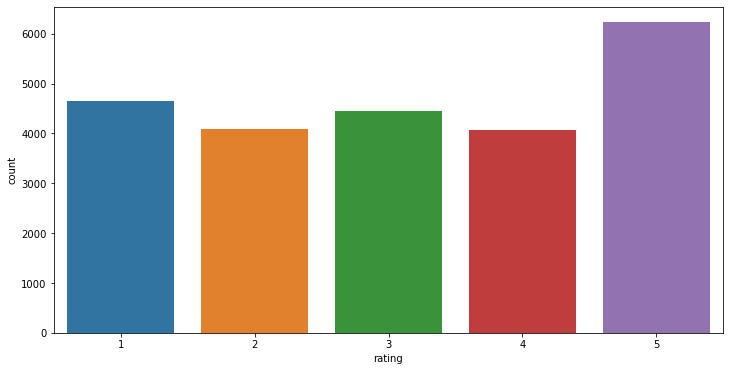

In [24]:
#ploting countplot
plt.figure(figsize=(12,6))
sns.countplot(df['rating'])

here we clearly observe that 5 rating data is more than all other ratings after 5 we can see 1 rating reviews are more

<AxesSubplot:xlabel='clean_length', ylabel='Count'>

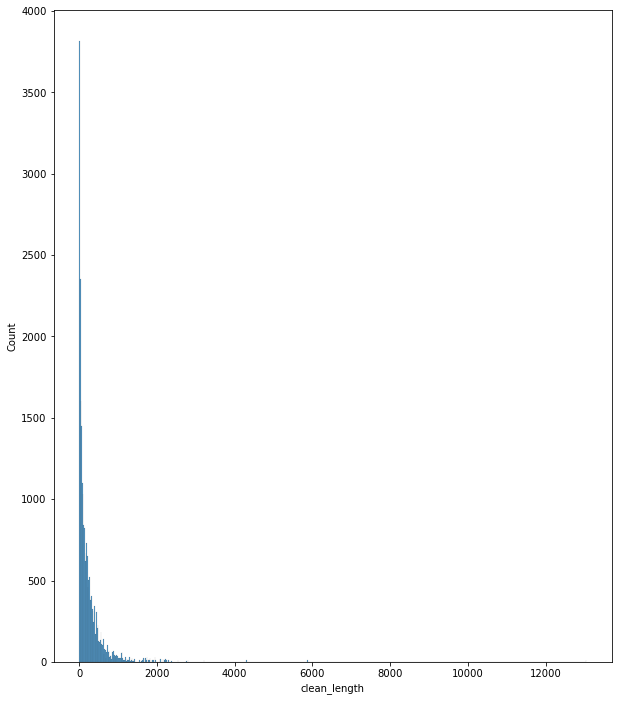

In [25]:
plt.figure(figsize=(10,12))
sns.histplot(df['clean_length'])

we can see the data was right skewed 

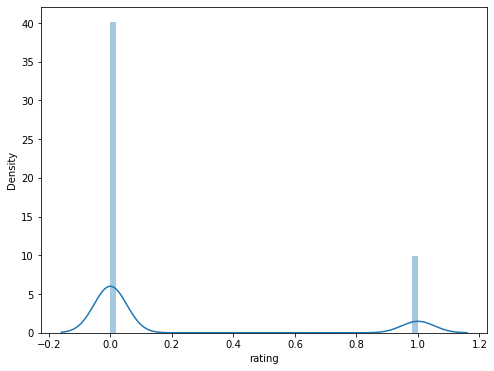

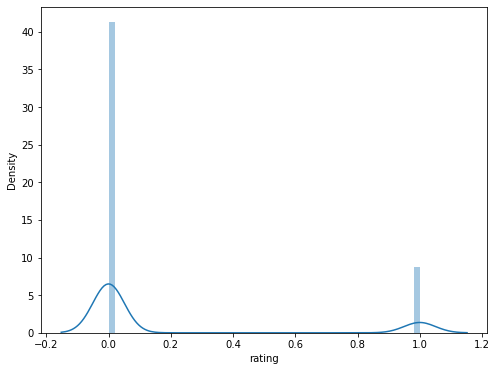

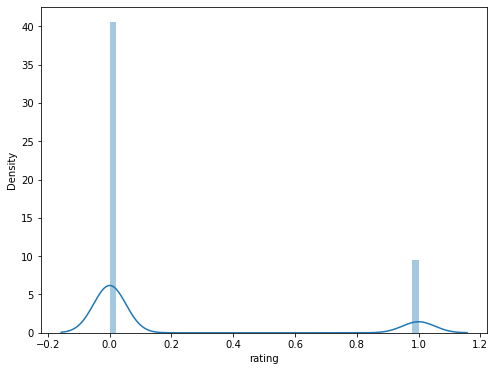

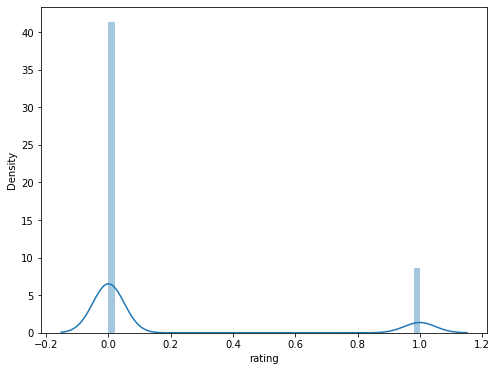

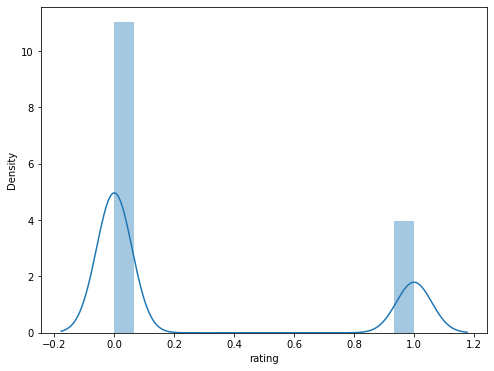

In [26]:

for i in range(1,6):
    plt.figure(figsize=(8,6))
    
    sns.distplot(df['rating']==i)

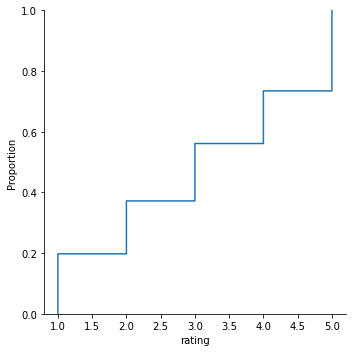

In [27]:
sns.displot(df['rating'],kind="ecdf")

<AxesSubplot:xlabel='clean_length', ylabel='Density'>

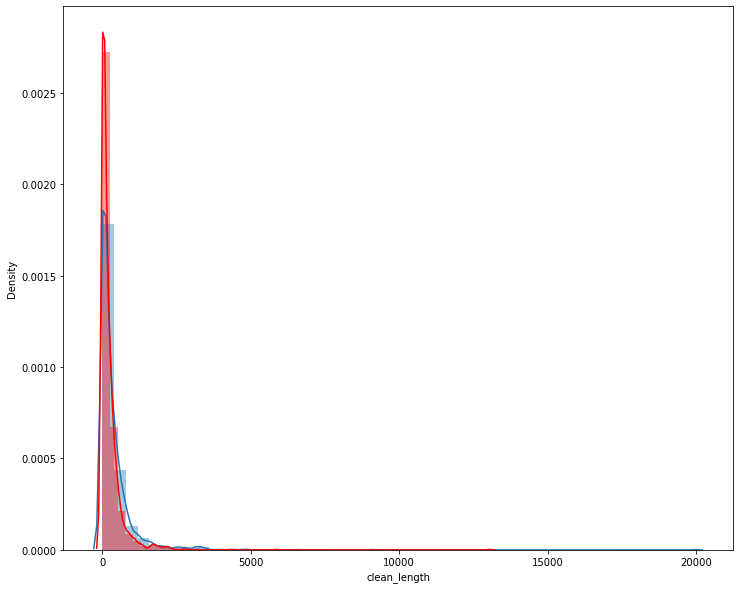

In [28]:
plt.figure(figsize=(12,10))
sns.distplot(df['length'])
sns.distplot(df['clean_length'],color='r')

here blue is original length and red is cleaned length of review column, it was giving so much difference after cleaning 

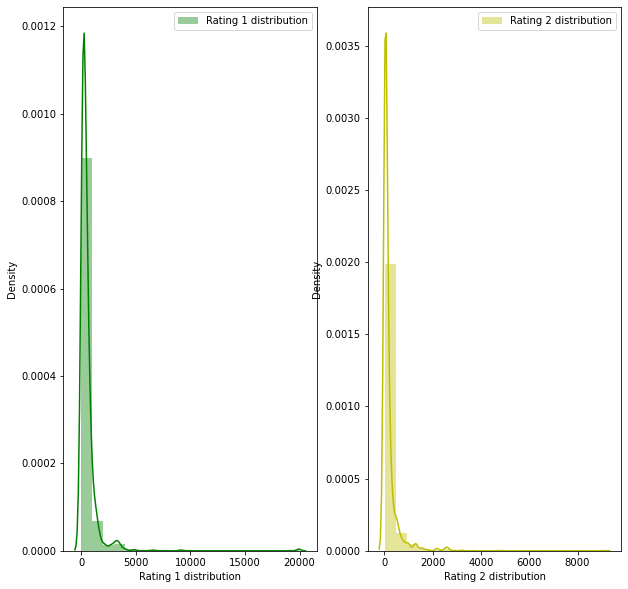

In [29]:

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['rating']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['rating']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

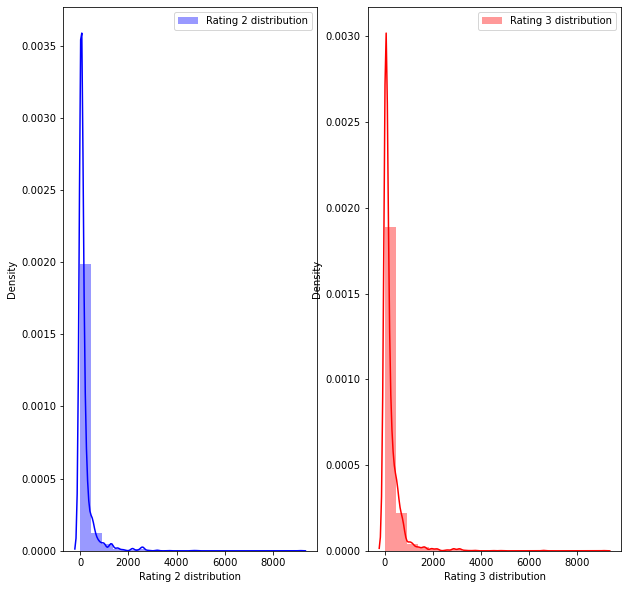

In [30]:

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['rating']==2]['length'],bins=20,ax=ax[0],label='Rating 2 distribution',color='b')
ax[0].set_xlabel('Rating 2 distribution')
ax[0].legend()

sns.distplot(df[df['rating']==3]['length'],bins=20,ax=ax[1],label='Rating 3 distribution',color='r')
ax[1].set_xlabel('Rating 3 distribution')
ax[1].legend()

plt.show()

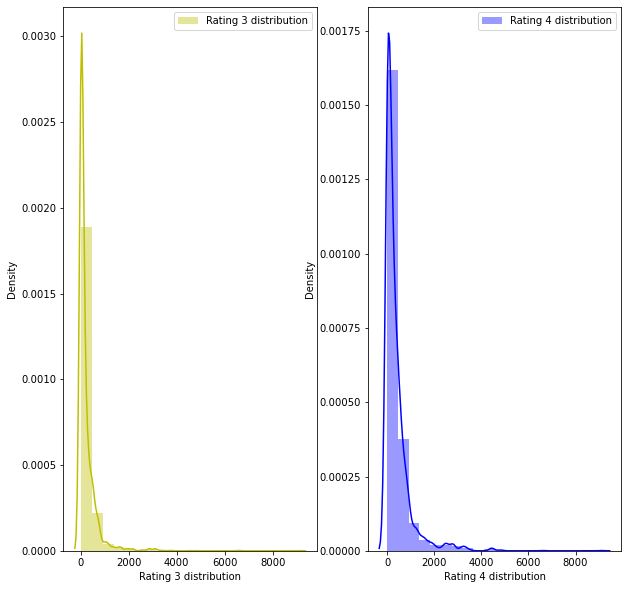

In [31]:

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['rating']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='y')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(df[df['rating']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='b')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

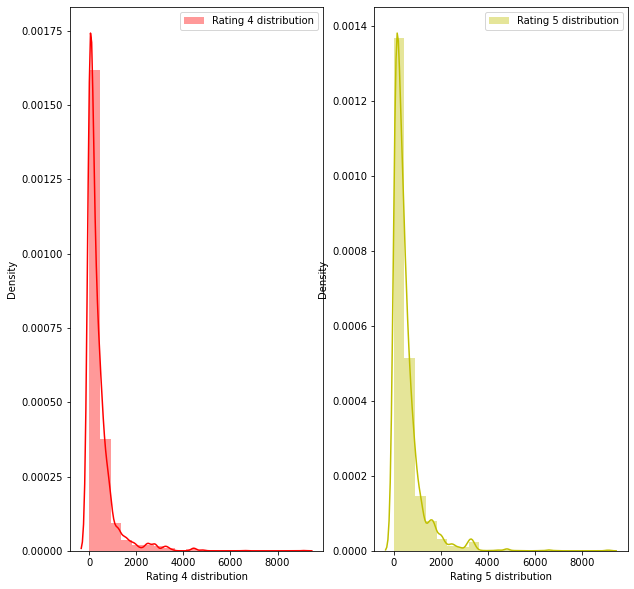

In [32]:

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['rating']==4]['length'],bins=20,ax=ax[0],label='Rating 4 distribution',color='r')
ax[0].set_xlabel('Rating 4 distribution')
ax[0].legend()

sns.distplot(df[df['rating']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='y')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

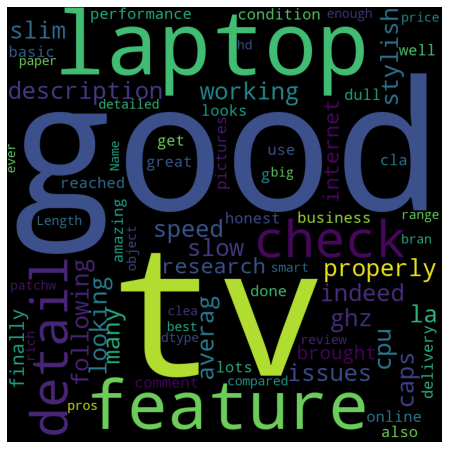

In [33]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['review']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
df

,rating,review,length,clean_length
0,3,check detail description cpu speed ghz slow la...,243,125
1,1,laptop working properly issues following caps ...,307,200
2,4,laptop indeed stylish slim good looking averag...,609,441
3,5,many research internet brought laptop finally ...,467,278
4,3,good performance basic use business online cla...,333,243
...,...,...,...,...
23531,3,tv looks great amazing features also get lots ...,311,190
23532,3,tv reached good condition delivery done well g...,343,205
23533,3,honest comment pictures dull compared big bran...,352,221
23534,3,best tv ever good price range detailed hd clea...,130,93


#### Spliting the data

In [35]:
x=df.drop(['rating'],axis=1)
y=df['rating']

In [36]:
x.shape

(23498, 3)

#### Handling the imbalce in data

In [37]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_res,y_res=us.fit_resample(x,y)

<AxesSubplot:>

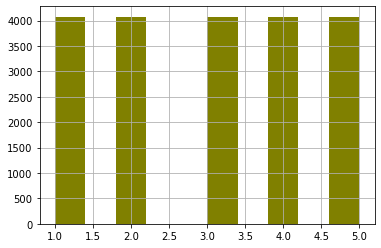

In [38]:
y_res.hist(grid=True,color='olive')

In [39]:
x_res

,review,length,clean_length
0,nice product value mone big bazaar ke liye hi ...,156,119
1,product overheating unbelievable great company...,391,249
2,,1,0
3,brought feb still using yrs usage wifi signal ...,280,146
4,waste money bad quality camera focus image pro...,511,393
...,...,...,...
20375,get connected pppoe matter customer care respo...,128,71
20376,good product found good price makes feel last ...,147,86
20377,received damaged product showing error code de...,163,124
20378,bought two wanted simple laser printer wifi co...,555,362


### Vectorizing the data

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(x_res.review).todense()
vocab = tfidf.vocabulary_
vocab

{'nice': 6869,
 'product': 8262,
 'value': 11335,
 'mone': 6620,
 'big': 1036,
 'bazaar': 901,
 'ke': 5618,
 'liye': 6001,
 'hi': 4842,
 'apki': 472,
 'monthly': 6646,
 'income': 5186,
 'tax': 10493,
 'return': 8980,
 'link': 5960,
 'continue': 2243,
 'watching': 11618,
 'playlist': 7927,
 'bhalo': 1026,
 'kore': 5700,
 'overheating': 7514,
 'unbelievable': 11073,
 'great': 4545,
 'company': 2020,
 'production': 8264,
 'devices': 2794,
 'cost': 2320,
 'matter': 6294,
 'quality': 8452,
 'matters': 6296,
 'builtin': 1388,
 'alex': 274,
 'working': 11839,
 'average': 734,
 'camera': 1493,
 'one': 7332,
 'plus': 7959,
 'numbrt': 7154,
 'device': 2793,
 'since': 9675,
 'far': 3822,
 'single': 9683,
 'problem': 8230,
 'face': 3767,
 'upgraded': 11223,
 'seems': 9382,
 'worst': 11863,
 'decision': 2611,
 'feeling': 3880,
 'brought': 1338,
 'feb': 3868,
 'still': 10110,
 'using': 11289,
 'yrs': 11994,
 'usage': 11266,
 'wifi': 11745,
 'signal': 9641,
 'strength': 10159,
 'issue': 5484,
 'faced

In [51]:
word2vec = np.random.randn(len(vocab),100)

In [52]:
sent2vec_matrix = np.dot(tfidf_matrix, word2vec) # word2vec here contains vectors in the same order as in vocab
x_res["sent2vec"] = sent2vec_matrix.tolist()
x_res

,review,length,clean_length,sent2vec
0,nice product value mone big bazaar ke liye hi ...,156,119,"[-1.005216013555299, -1.6665543371275666, -0.3..."
1,product overheating unbelievable great company...,391,249,"[-0.9078550963617485, 0.07513116288362673, 0.5..."
2,,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,brought feb still using yrs usage wifi signal ...,280,146,"[-1.5118645753284123, -0.3563106832226926, -1...."
4,waste money bad quality camera focus image pro...,511,393,"[-0.688175535819303, 0.4757622537739718, -1.11..."
...,...,...,...,...
20375,get connected pppoe matter customer care respo...,128,71,"[-0.27398959324267347, -0.4753585464755889, -0..."
20376,good product found good price makes feel last ...,147,86,"[-1.5151148424972798, -0.8320263378765508, -0...."
20377,received damaged product showing error code de...,163,124,"[0.8591361664401075, 0.9408374027724968, -0.54..."
20378,bought two wanted simple laser printer wifi co...,555,362,"[-1.7484471326629876, -0.263120233733769, 0.03..."


In [67]:
len(x_res['sent2vec'][30])

100

### train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_res['sent2vec'],y_res,test_size=0.30,random_state=50)

In [69]:
x_train.shape

(14266,)

In [70]:
x_test.shape

(6114,)

In [71]:
y_train.shape

(14266,)

In [72]:
y_test.shape

(6114,)

### applying machine algorithms

In [73]:
models=[LogisticRegression(),DecisionTreeClassifier(),
       RandomForestClassifier(),SVC(),AdaBoostClassifier(),
       GradientBoostingClassifier(),KNeighborsClassifier() ]

In [74]:
for m in models:
    print('model name:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,m.predict(x_test)))
    print()
    print("Cross validation score:")
    scr=cross_val_score(m,x,y,cv=5)
    print('score',scr.mean())
    print('------------------------------------------------------------------------------')

model name: LogisticRegression()


ValueError: setting an array element with a sequence.